# Thông tin sinh viên
* Họ tên: Mai Duy Nam
* MSSV: 19120298

# Nạp dữ liệu

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

sns.set_theme(style='whitegrid', palette='colorblind')

In [2]:
features_df = pd.read_csv('featuresdf.csv', index_col=0)
features_df.head()

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,,,
7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


# Khám phá, tiền xử lý

## Kiểm tra kiểu dữ liệu

Các cột đều đã có kiểu dữ liệu phù hợp. Trong số các cột này, cột `mode` và `key` có thể được hiểu theo cả kiểu dữ liệu định tính lẫn định lượng. Theo [mô tả dữ liệu](https://www.kaggle.com/datasets/nadintamer/top-tracks-of-2017), `mode` thể hiện cho điệu thức của bài hát (0: minor, 1: major), `key` thể hiện cho key của bài hát (giá trị 0-11 đại diện cho nốt C, C#, D, ..., B). Ở đây để thuận tiện, ta sẽ giữ nguyên thể hiện theo dạng số của hai cột này.

In [3]:
features_df.dtypes

name                 object
artists              object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
dtype: object

## Kiểm tra dữ liệu thiếu

In [4]:
features_df.isna().sum()

name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

## Kiểm tra phân bố của các cột

In [5]:
features_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00
mean,0.69682,0.660690,5.570000,-5.652650,0.580000,0.103969,0.166306,0.004796,0.150607,0.517049,119.202460,218387.28000,3.99
std,0.12508,0.139207,3.731534,1.802067,0.496045,0.095115,0.166730,0.026038,0.079011,0.216436,27.952928,32851.07772,0.10
min,0.25800,0.346000,0.000000,-11.462000,0.000000,0.023200,0.000259,0.000000,0.042400,0.086200,75.016000,165387.00000,3.00
25%,0.63500,0.556500,2.000000,-6.594500,0.000000,0.043125,0.039100,0.000000,0.098275,0.375500,99.911750,198490.50000,4.00
50%,0.71400,0.667500,6.000000,-5.437000,1.000000,0.062650,0.106500,0.000000,0.125000,0.502500,112.468000,214106.00000,4.00
75%,0.77025,0.787500,9.000000,-4.326750,1.000000,0.123000,0.231250,0.000013,0.179250,0.679000,137.166000,230543.00000,4.00
max,0.92700,0.932000,11.000000,-2.396000,1.000000,0.431000,0.695000,0.210000,0.440000,0.966000,199.864000,343150.00000,4.00


# Trực quan hóa

## Trích ra các cột số và chuẩn hóa dữ liệu

Trích ra các cột có kiểu số.

In [6]:
numeric_data_df = features_df.select_dtypes(include=np.number)
numeric_data_df.shape

(100, 13)

Thực hiện chuẩn hóa dữ liệu.

In [7]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_data_df)
normalized_data_df = pd.DataFrame(normalized_data, index=numeric_data_df.index, columns=numeric_data_df.columns)
normalized_data_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,
7qiZfU4dY1lWllzX7mPBI,1.029949,-0.062739,-1.230867,1.377358,-1.175139,-0.251157,2.499753,-0.185123,-0.731504,1.922214,-0.835063,0.468871,0.100504
5CtI0qwDJkDQGwXD1H1cL,-0.022659,1.114076,-0.961531,0.738776,0.850963,0.169393,0.377914,-0.185123,-0.740408,1.374272,-1.088400,0.319390,0.100504
4aWmUDTfIPGksMNLV2rQP,-0.295855,0.904704,-0.961531,0.499516,0.850963,0.697721,0.257355,-0.185123,-0.491091,1.527510,2.108041,0.300208,0.100504
6RUKPb4LETWmmr3iAEQkt,-0.641368,-0.185475,1.462497,-0.622604,-1.175139,-0.763635,-0.702296,-0.184568,0.170362,-0.329922,-0.581871,0.880266,0.100504
3DXncPQOG4VBw3QHh3S81,-0.705649,0.052776,0.385151,0.763315,0.850963,-0.710803,-0.669745,-0.185123,0.208523,1.364984,-1.376289,2.148071,0.100504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PSBzsahR2AKwLJgx8ehB,-0.175328,0.211610,-0.961531,0.497286,0.850963,0.296192,0.263382,-0.185123,1.734955,-1.137904,0.669279,0.639584,0.100504
0QsvXIfqM0zZoerQfsI9l,-1.244006,1.431744,1.462497,0.000920,0.850963,0.983019,-0.038015,-0.005255,-0.173085,-0.529595,1.459563,-0.316164,0.100504
7mldq42yDuxiUNn08nvzH,0.274642,-1.383949,-0.153522,-0.877479,0.850963,-0.754126,1.788455,-0.185083,-0.605573,0.529140,-0.727703,-1.621478,0.100504


## Giảm chiều

### Giảm chiều dữ liệu xuống 2 chiều

Giảm chiều bằng PCA.

In [8]:
pca2 = PCA(n_components=2)
pca_reduced_2d = pca2.fit_transform(normalized_data_df)
pca_reduced_2d.shape

(100, 2)

Giảm chiều bằng TSNE

In [9]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random')
tsne_reduced_2d = tsne.fit_transform(normalized_data_df)
tsne_reduced_2d.shape

(100, 2)

Trực quan hóa dữ liệu đã giảm chiều.

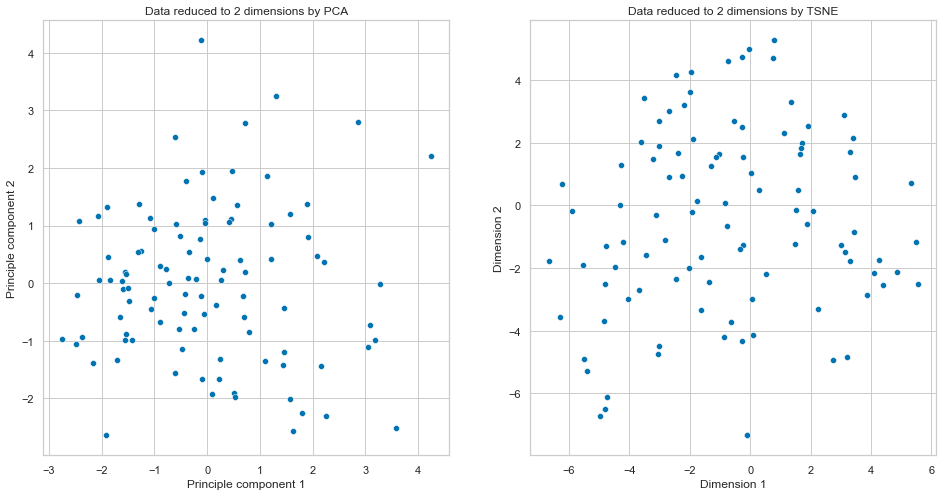

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.scatterplot(x=pca_reduced_2d[:, 0], y=pca_reduced_2d[:, 1], ax=axes[0])
sns.scatterplot(x=tsne_reduced_2d[:, 0], y=tsne_reduced_2d[:, 1], ax=axes[1])

axes[0].set_xlabel('Principle component 1')
axes[0].set_ylabel('Principle component 2')
axes[0].set_title('Data reduced to 2 dimensions by PCA')

axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].set_title('Data reduced to 2 dimensions by TSNE')
plt.show()

### Giảm chiều dữ liệu xuống 3 chiều

Giảm chiều và trực quan hóa bằng PCA.

In [11]:
pca3 = PCA(n_components=3)
pca_reduced_3d = pca3.fit_transform(normalized_data_df)
pca_reduced_3d.shape

(100, 3)

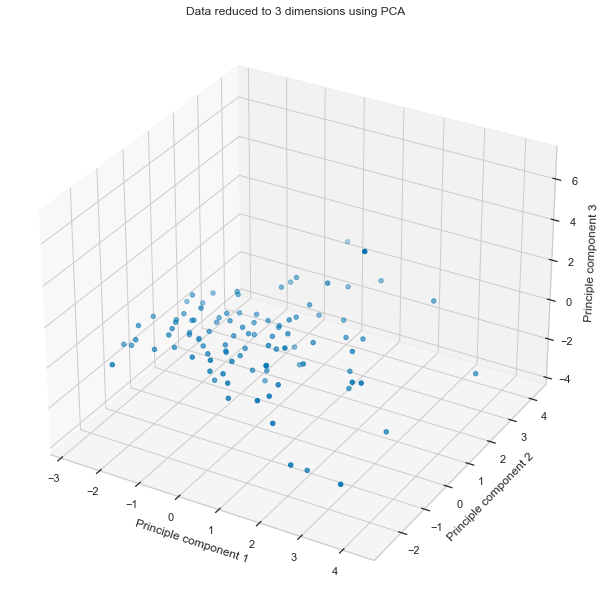

In [12]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(
    pca_reduced_3d[:, 0],
    pca_reduced_3d[:, 1],
    pca_reduced_3d[:, 2],
)

ax.set_title('Data reduced to 3 dimensions using PCA')
ax.set_xlabel('Principle component 1')
ax.set_ylabel('Principle component 2')
ax.set_zlabel('Principle component 3')
plt.show()

Giảm chiều và trực quan hóa bằng TSNE.

In [13]:
tsne3 = TSNE(n_components=3, learning_rate='auto', init='random')
tsne_reduced_3d = tsne3.fit_transform(normalized_data_df)
tsne_reduced_3d.shape

(100, 3)

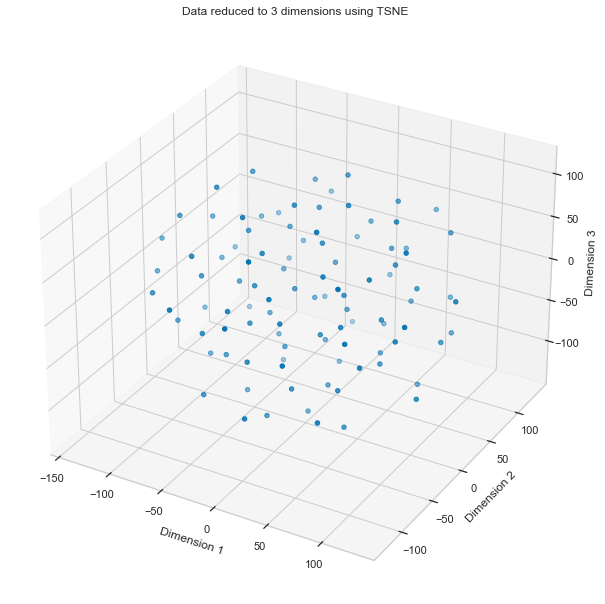

In [14]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(
    tsne_reduced_3d[:, 0],
    tsne_reduced_3d[:, 1],
    tsne_reduced_3d[:, 2],
)

ax.set_title('Data reduced to 3 dimensions using TSNE')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()

# So sánh giữa PCA và TSNE

## Về ý tưởng và ứng dụng

Cả PCA và TSNE là thuật toán dùng để giảm chiều dữ liệu từ $n$ chiều xuống $k$ chiều ($k \le n$). PCA dựa trên ma trận hiệp phương sai và vector riêng để tìm không gian $k$ chiều tốt nhất và dùng nó để chiếu các điểm dữ liệu gốc lên. TSNE sắp xếp vị trí của các điểm dữ liệu trong không gian $k$ chiều dựa trên khoảng cách giữa chúng trong tập dữ liệu gốc. TSNE tìm cách sắp xếp sao cho các phân cụm cũ trong tập dữ liệu gốc được bảo toàn.

TSNE được ứng dụng nhiều trong trực quan hóa dữ liệu. PCA ngoài sử dụng trong trực quan, còn ứng dụng trong việc nén dữ liệu, lọc nhiễu và tăng tốc độ học của các mô hình học máy.

## Ưu điểm và nhược điểm

<table>
    <thead>
    <tr>
        <th style="text-align:left">Thuật toán</th>
        <th style="text-align:left">Ưu điểm</th>
        <th style="text-align:left">Nhược điểm</th>
    </tr>
    </thead>
    <tbody>
    <tr>
        <td style="text-align:left">PCA</td>
        <td style="text-align:left">
            <ul>
                <li>Tất định (kết quả trả về luôn giống nhau với cùng tập dữ liệu)</li>
                <li>Giữ lại các trend trong dữ liệu</li>
                <li>Tạo ra các tham số (vector riêng) từ đó có thể áp dụng cùng phép biến đổi với các tập dữ liệu mới</li>
                <li>Có thể tạo dựng lại xấp xỉ của tập dữ liệu cũ</li>
            </ul>
        </td>
        <td style="text-align:left">
            <ul>
                <li>Bị ảnh hưởng bởi ngoại lai</li>
                <li>Chỉ hoạt động tốt nếu các thuộc tính có quan hệ tuyến tính với nhau</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td style="text-align:left">TSNE</td>
        <td style="text-align:left">
            <ul>
                <li>Giữ lại tính phân cụm trong dữ liệu</li>
                <li>Không bị ảnh hưởng bởi ngoại lai</li>
                <li>Tốt hơn khi ứng dụng trong trực quan hóa</li>
            </ul>
        </td>
        <td style="text-align:left">
            <ul>
                <li>Cùng một tập dữ liệu có thể cho ra các kết quả khác nhau</li>
                <li>Không thể áp dụng cùng cách biến đổi đối với các tập dữ liệu mới</li>
            </ul>
        </td>
    </tr>
    </tbody>
</table>